In [1]:
library(GSVA)
library(GSEABase)
library(msigdbr)
library(org.Hs.eg.db)
library(enrichplot)
library(limma)

Warning message:
“multiple methods tables found for ‘which’”
Warning message:
“multiple methods tables found for ‘which’”
Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which

In [2]:
library(clusterProfiler)

clusterProfiler v3.16.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [3]:
msigdbr_species()

species_name,species_common_name
<chr>,<chr>
Anolis carolinensis,"Carolina anole, green anole"
Bos taurus,"bovine, cattle, cow, dairy cow, domestic cattle, domestic cow"
Caenorhabditis elegans,roundworm
Canis lupus familiaris,"dog, dogs"
Danio rerio,"leopard danio, zebra danio, zebra fish, zebrafish"
Drosophila melanogaster,fruit fly
Equus caballus,"domestic horse, equine, horse"
Felis catus,"cat, cats, domestic cat"
Gallus gallus,"bantam, chicken, chickens, Gallus domesticus"


In [4]:
ALNOR2<-read.csv('0915-merge.markersAL.csv')
AL3NOR2<-read.csv('0915-merge.markersALhi.csv')

In [5]:
ALNOR2<-ALNOR2[which(ALNOR2$cluster=='5'),]

In [6]:
AL3NOR2<-AL3NOR2[which(AL3NOR2$cluster=='5'),]

In [7]:
ALNOR2

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
315,C1QC,1.240366e-95,0.7408135,0.251,0.013,2.588396e-91,5,C1QC
316,C1QB,8.652645e-87,1.0287832,0.368,0.038,1.805634e-82,5,C1QB
317,AIF1,2.754343e-73,1.2893174,0.515,0.097,5.747763e-69,5,AIF1
318,TMSB4X,1.169791e-72,2.7167296,0.947,0.617,2.441119e-68,5,TMSB4X
319,C1QA,1.102850e-61,0.9484391,0.333,0.045,2.301428e-57,5,C1QA
320,APOC1,1.051556e-60,1.1003647,0.421,0.076,2.194387e-56,5,APOC1
321,TYROBP,3.186123e-58,1.0541236,0.456,0.092,6.648801e-54,5,TYROBP
322,HLA-DPB1,7.433601e-49,1.2490018,0.316,0.051,1.551244e-44,5,HLA-DPB1
323,HLA-DRA,7.135931e-47,1.1198692,0.374,0.075,1.489126e-42,5,HLA-DRA


In [8]:
ALNOR2<-ALNOR2[which(ALNOR2$p_val<0.05),]
AL3NOR2<-AL3NOR2[which(AL3NOR2$p_val<0.05),]

In [9]:
ALNOR2<-ALNOR2[which(ALNOR2$avg_log2FC>0),]
AL3NOR2<-AL3NOR2[which(AL3NOR2$avg_log2FC>0),]

In [10]:
ge = ALNOR2$avg_log2FC
names(ge) = ALNOR2$X
ge = sort(ge,decreasing = T)
head(ge)

TMSB4X      LYZ   S100A9   IGHA12   S100A8      FTL 
2.716730 2.031735 1.770899 1.747244 1.528163 1.478357

In [11]:
geneset<-read.csv('C0002726_disease_gda_summary.csv')

In [12]:
library(tidyverse) 
GO_df<-data.frame('Amyloidosis',geneset$Gene)
colnames(GO_df)<-c('gs_exact_source','gene_symbol')
GO_df<-as_tibble(GO_df)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ stringr::boundary() masks graph::boundary()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks clusterProfiler::filter(), stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGener

In [13]:
em <-GSEA(ge, TERM2GENE = GO_df,minGSSize = 1, pvalueCutoff = 0.99, verbose = F)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


[1] "LYZ/S100A9/S100A8/AIF1/APOE/TYROBP/C1QB/C1QA/ACTB/CST3/C1QC/HMOX1/GPX1"

[1] 0.001043368

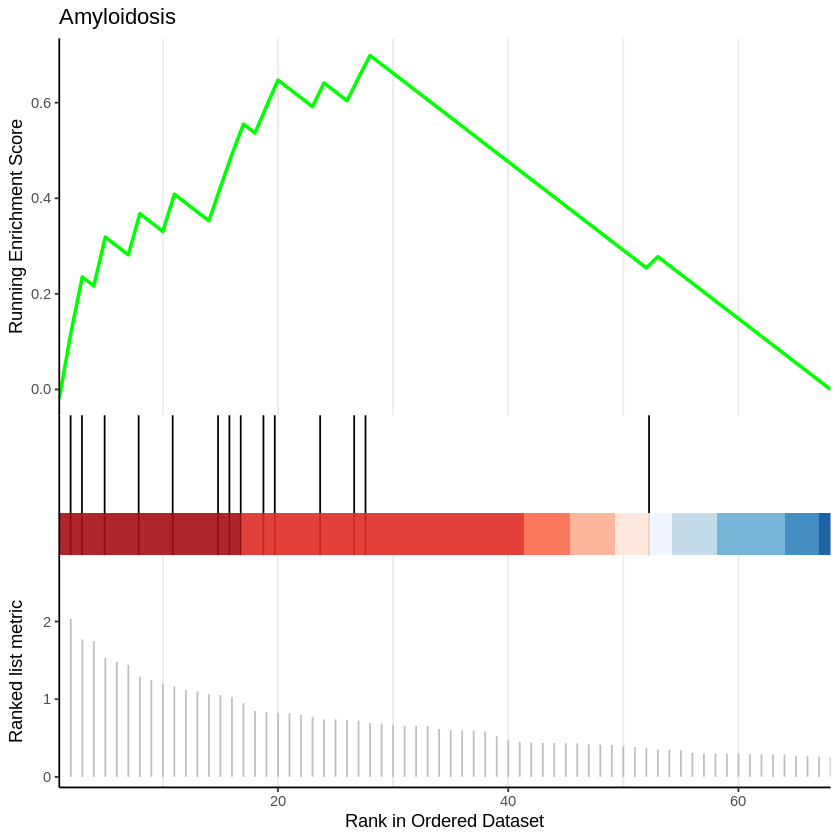

In [14]:
gseaplot2(em, geneSetID = 1, title = em$Description[1])
em$core_enrichment
em$pvalue

In [15]:
ggsave('CCND1low.amy.pdf',width=6,height=6)
dev.off()

null device 
          1

In [16]:
em

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:68] 2.72 2.03 1.77 1.75 1.53 ...
 - attr(*, "names")= chr [1:68] "TMSB4X" "LYZ" "S100A9" "IGHA12" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.99 
#...1 enriched terms found
'data.frame':	1 obs. of  11 variables:
 $ ID             : chr "Amyloidosis"
 $ Description    : chr "Amyloidosis"
 $ setSize        : int 14
 $ enrichmentScore: num 0.699
 $ NES            : num 1.83
 $ pvalue         : num 0.00104
 $ p.adjust       : num 0.00104
 $ qvalues        : logi NA
 $ rank           : int 28
 $ leading_edge   : chr "tags=93%, list=41%, signal=69%"
 $ core_enrichment: chr "LYZ/S100A9/S100A8/AIF1/APOE/TYROBP/C1QB/C1QA/ACTB/CST3/C1QC/HMOX1/GPX1"
#...Citation
  Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
  clusterProfiler: an R package for comparing biological themes among
  gene clusters. OMICS: A Journal of Integrative Biology
  2012, 16(5):284-287 


In [17]:
ge2 = AL3NOR2$avg_log2FC
names(ge2) = AL3NOR2$X
ge2 = sort(ge2,decreasing = T)
head(ge2)

FTL   TMSB4X     APOE     AIF1    APOC1     C1QB 
1.972776 1.706040 1.143027 1.031917 1.025624 1.009912

In [18]:
em2 <-GSEA(ge2, TERM2GENE = GO_df,minGSSize = 1, pvalueCutoff = 0.99, verbose = F)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”


[1] "APOE/AIF1/C1QB/C1QA/GPX1/CST3/TYROBP/C1QC/ACTB/HMOX1"

[1] 0.0009820694

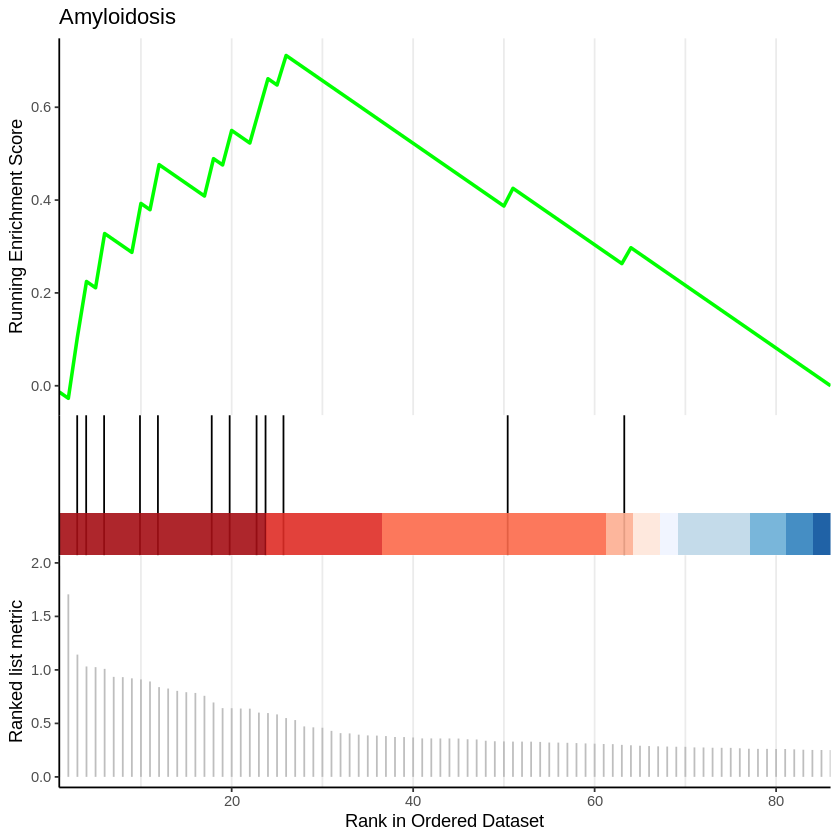

In [19]:
gseaplot2(em2, geneSetID = 1, title = em2$Description[1])
em2$core_enrichment
em2$pvalue

In [20]:
ggsave('CCND1hi.amy.pdf',width=6,height=6)
dev.off()

null device 
          1

In [21]:
em2

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:86] 1.97 1.71 1.14 1.03 1.03 ...
 - attr(*, "names")= chr [1:86] "FTL" "TMSB4X" "APOE" "AIF1" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.99 
#...1 enriched terms found
'data.frame':	1 obs. of  11 variables:
 $ ID             : chr "Amyloidosis"
 $ Description    : chr "Amyloidosis"
 $ setSize        : int 12
 $ enrichmentScore: num 0.711
 $ NES            : num 1.95
 $ pvalue         : num 0.000982
 $ p.adjust       : num 0.000982
 $ qvalues        : logi NA
 $ rank           : int 26
 $ leading_edge   : chr "tags=83%, list=30%, signal=68%"
 $ core_enrichment: chr "APOE/AIF1/C1QB/C1QA/GPX1/CST3/TYROBP/C1QC/ACTB/HMOX1"
#...Citation
  Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
  clusterProfiler: an R package for comparing biological themes among
  gene clusters. OMICS: A Journal of Integrative Biology
  2012, 16(5):284-287 
